![imagen.png](attachment:imagen.png)

<a href="https://colab.research.google.com/github/joanby/python-ml-course/blob/master/notebooks/T10%20-%201%20-%20Analisis%20de%20Componentes%20Principales-Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Consignas:
# Analizar y resolver
# Subir a repositorio de Github, con al menos un pull request, y devolver el link

1- Generar un set de datos, con al menos 4 predictores

2- Dado el siguiente código indicar que tipo de problema instanta resolver. 

3- Evaluar los resultados.

4- Agregar otro algoritmo para resolver sobre el mismo set de datos.





In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns

# Para generar los datos usaremos las funciones provistas en sklearn

sklearn.datasets: Datasets


In [2]:
# Datos
# ==============================================================================
from sklearn.datasets import fetch_california_housing


california_housing = fetch_california_housing()
datos = pd.DataFrame(
    data=np.c_[california_housing['data'],california_housing['target']],
    columns=california_housing['feature_names']+['target'])
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [3]:
datos.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
# Correlación entre columnas numéricas
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = datos.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
61,Latitude,Longitude,-0.924664,0.924664
69,Longitude,Latitude,-0.924664,0.924664
29,AveBedrms,AveRooms,0.847621,0.847621
21,AveRooms,AveBedrms,0.847621,0.847621
72,target,MedInc,0.688075,0.688075
8,MedInc,target,0.688075,0.688075
18,AveRooms,MedInc,0.326895,0.326895
2,MedInc,AveRooms,0.326895,0.326895
37,Population,HouseAge,-0.296244,0.296244
13,HouseAge,Population,-0.296244,0.296244


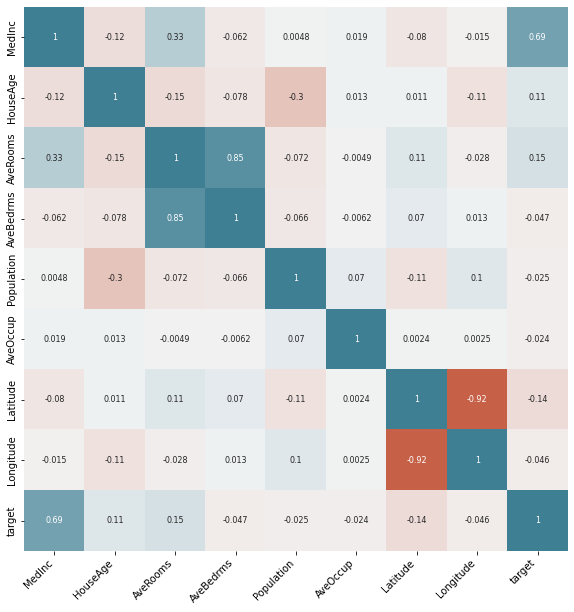

In [6]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

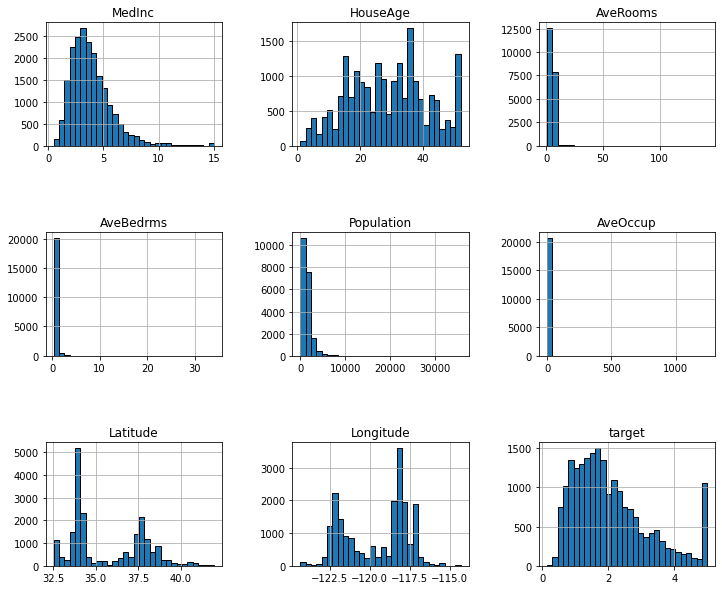

In [8]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
datos.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)


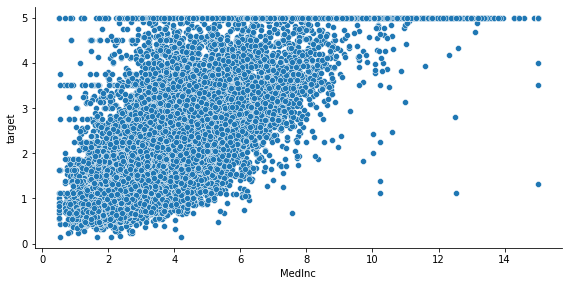

In [10]:
sns.pairplot(data=datos, y_vars=['target'],
                 x_vars=['MedInc'],
                 aspect=2, height=4)

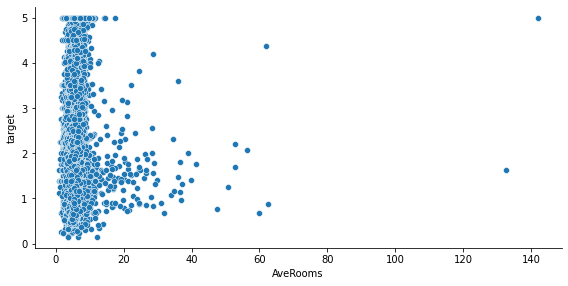

In [12]:
sns.pairplot(data=datos, y_vars=['target'],
                 x_vars=['AveRooms'],
                 aspect=2, height=4)

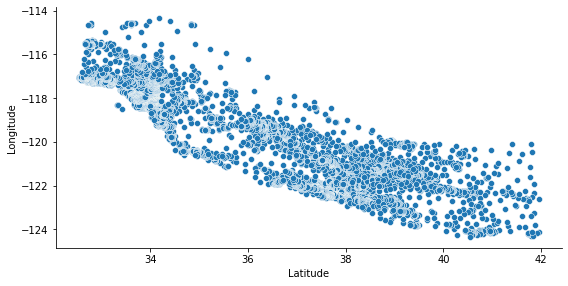

In [14]:
sns.pairplot(data=datos, y_vars=['Longitude'],
                 x_vars=['Latitude'],
                 aspect=2, height=4)

In [15]:
# División de los datos en train y test
# ==============================================================================
from sklearn.model_selection import train_test_split

x = datos.drop(columns = 'target')
y = datos['target']

x_train, x_test, y_train, y_test = train_test_split(
    x, 
    y,
    test_size=0.3, 
    random_state=1)

# LinearRegression

In [16]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(
    normalize = True, 
    fit_intercept = False, 
    copy_X = True).fit(x_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


In [17]:
# Diagnóstico errores (residuos) de las predicciones de entrenamiento
# ==============================================================================
from sklearn.metrics import r2_score

print("Training score: ", model.score(x_train, y_train))

y_pred = model.predict(x_test)
print("Testing score: ", r2_score(y_test, y_pred))

Training score:  0.549050547146062
Testing score:  0.538501431649286


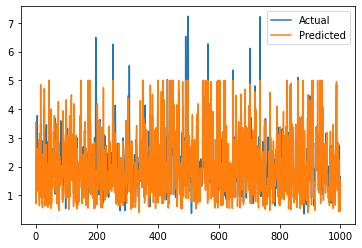

In [30]:
# Grafico
# ==============================================================================

gr = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
gr = gr.reset_index()
gr = gr.drop(['index'],axis=1)
plt.plot(gr[:1000])
plt.legend(['Actual','Predicted'])

# LassoRegression

In [31]:
from sklearn.linear_model import Lasso

lasso_regressor = Lasso(
    alpha = 1, 
    fit_intercept= True, 
    normalize= False, 
    max_iter = 20000).fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


In [32]:
print("Training score : ", lasso_regressor.score(x_train, y_train))

y_pred = lasso_regressor.predict(x_test)
print("testing score : ", r2_score(y_test, y_pred))

Training score :  0.2868306696292975
testing score :  0.2895682320347275


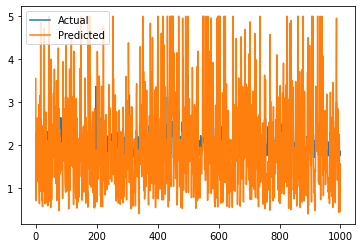

In [33]:
# Grafico
# ==============================================================================

gr = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
gr = gr.reset_index()
gr = gr.drop(['index'],axis=1)
plt.plot(gr[:1000])
plt.legend(['Actual','Predicted'])

#Ridgegression

In [34]:
from sklearn.linear_model import Ridge

ridge_regressor = Ridge(
    alpha = 0.4, 
    fit_intercept= True, 
    normalize= False, 
    max_iter = 20000).fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


In [35]:
print("Training score : ", ridge_regressor.score(x_train, y_train))

y_pred = ridge_regressor.predict(x_test)
print("testing score : ", r2_score(y_test, y_pred))

Training score :  0.6097141955503307
testing score :  0.5971418151073309


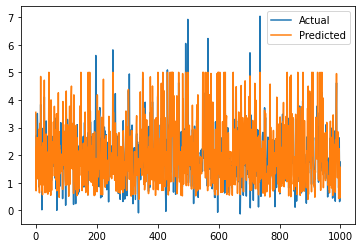

In [36]:
# Grafico
# ==============================================================================

gr = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
gr = gr.reset_index()
gr = gr.drop(['index'],axis=1)
plt.plot(gr[:1000])
plt.legend(['Actual','Predicted'])